<a href="https://colab.research.google.com/github/israa252/Prediction-of-Product-Sales/blob/main/Project_1_Part_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Part 8

 - By: Israa Rasheed

#Import libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config

# Return pandas DataFrames instead of numpy arrays
set_config(transform_output='pandas')


#Load data

In [4]:
# Load the raw dataset (unmodified)
path = "path/to/sales_dataset.csv"
df = pd.read_csv("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv")

# Quick inspection
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Clean before split

In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Fix inconsistent categories for Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# Drop Item_Identifier (too many unique IDs)
df = df.drop(columns=['Item_Identifier'])


# Explanation:
 standardized the categories in "Item_Fat_Content" because the same category
 was written in different ways (e.g., "LF", "low fat", "Low Fat").
 Without fixing this, the OneHotEncoder would treat them as separate categories.
 We dropped "Item_Identifier" because it is a unique product ID with very high
 cardinality. It does not provide useful predictive information but would create
 many unnecessary dummy columns after encoding.

#Separate features (X) and target (y)

In [6]:
target = "Item_Outlet_Sales"
y = df[target]
X = df.drop(columns=[target])


#Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)


#Identify column types

In [8]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


#Build preprocessing pipelines

In [9]:
# Numeric pipeline
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# Categorical pipeline
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)


#Create ColumnTransformer

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", num_pipe, num_cols),
        ("categorical", cat_pipe, cat_cols)
    ],
    verbose_feature_names_out=False
)


#Fit and transform

In [11]:
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.801383,-0.600703,0.470709,0.136169,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,1.210152,-0.362159,0.457877,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
764,1.115491,0.194933,-0.482625,-0.102066,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,-1.079448,-0.704944,-1.603553,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2716,-0.008602,1.383177,0.218375,-0.102066,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:

print(X_train_processed.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1'

In [13]:
print("Number of missing values:", X_train_processed.isna().sum().sum())

Number of missing values: 0


#Validate processed data

In [14]:
# Ensure all columns numeric
print(all(X_train_processed.dtypes == "float64"))

# Confirm scaling worked on numeric features
X_train_processed[num_cols].describe().round(2)


True


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6818.00,6818.00,6818.00,6818.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.97,-1.29,-1.77,-1.53
25%,-0.83,-0.76,-0.76,-1.29
50%,0.00,-0.23,0.04,0.14
75%,0.76,0.56,0.72,0.73
max,2.00,5.10,2.00,1.33


# Modeling

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Evaluation function

In [16]:

def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    print(f"\n {name}")
    print(f"Train -> R²: {r2_train:.3f}, RMSE: {rmse_train:.2f}")
    print(f"Test  -> R²: {r2_test:.3f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

    return {
        "R2_Train": r2_train, "R2_Test": r2_test,
        "RMSE_Train": rmse_train, "RMSE_Test": rmse_test,
        "MAE_Test": mae_test
    }



# Linear Regression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

lin_results = evaluate_model(lin_reg, X_train_processed, y_train, X_test_processed, y_test, "Linear Regression")


 Linear Regression
Train -> R²: 0.559, RMSE: 1141.53
Test  -> R²: 0.579, RMSE: 1069.36, MAE: 792.02


#Random Forest (Default)

In [18]:
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train_processed, y_train)

rf_default_results = evaluate_model(rf_default, X_train_processed, y_train, X_test_processed, y_test, "Random Forest (Default)")



 Random Forest (Default)
Train -> R²: 0.937, RMSE: 430.05
Test  -> R²: 0.568, RMSE: 1083.22, MAE: 757.00


#Tuned Random Forest

In [19]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(rf, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train_processed, y_train)

print("Best Parameters:", grid.best_params_)

rf_tuned = grid.best_estimator_
rf_tuned_results = evaluate_model(rf_tuned, X_train_processed, y_train, X_test_processed, y_test, "Random Forest (Tuned)")

Best Parameters: {'max_depth': 10, 'n_estimators': 200}

 Random Forest (Tuned)
Train -> R²: 0.716, RMSE: 915.85
Test  -> R²: 0.602, RMSE: 1040.57, MAE: 728.20


In [20]:
print("Linear Regression:", lin_results)
print("Random Forest (Default):", rf_default_results)
print("Random Forest (Tuned):", rf_tuned_results)

Linear Regression: {'R2_Train': 0.5594752325556047, 'R2_Test': 0.579266411441941, 'RMSE_Train': np.float64(1141.5315993248257), 'RMSE_Test': np.float64(1069.3649048482189), 'MAE_Test': 792.0247141085217}
Random Forest (Default): {'R2_Train': 0.9374767741359172, 'R2_Test': 0.5682937068552985, 'RMSE_Train': np.float64(430.05446517418375), 'RMSE_Test': np.float64(1083.2196371638406), 'MAE_Test': 756.995692060997}
Random Forest (Tuned): {'R2_Train': 0.716444114327162, 'R2_Test': 0.6016184642637891, 'RMSE_Train': np.float64(915.8452677741735), 'RMSE_Test': np.float64(1040.5715204750807), 'MAE_Test': 728.1994161379126}


## Model Recommendation

After testing several models, I recommend using the **Tuned Random Forest**.  

### Why?
- It achieves the **best test performance** among all models.  
- The gap between training (R² = 0.716) and testing (R² = 0.602) is small, meaning the model is **not overfitting**.  
- Test R² = 0.602 means the model explains about **60% of the variation in sales**. In simple terms: if sales were a puzzle with 100 pieces, our model can correctly predict about 60 of them.  

### Additional Metric
We also evaluate the model using **Root Mean Squared Error (RMSE)**, which measures the average prediction error in the same units as sales.  
- The RMSE ≈ **1040** → on average, our predictions are off by about **1,040 sales units**.  
- RMSE is chosen because it is intuitive: it shows how far our predictions deviate from actual sales in real-world numbers.  

### Overfitting/Underfitting Check
- Training R² = 0.716  
- Testing R² = 0.602  
- The difference is moderate, which shows the model generalizes well and does not memorize the training data.  

**Final Decision:** Implement the **Tuned Random Forest** as it offers the best balance between accuracy and generalization.  


#Part 8: Model Explainability

#1. Linear Regression Coefficients

Top Positive Coefficients:
                          Feature  Coefficient
2                        Item_MRP   979.457812
41  Outlet_Type_Supermarket Type3   709.598832
27       Outlet_Identifier_OUT027   709.598832
39  Outlet_Type_Supermarket Type1   338.852519
28       Outlet_Identifier_OUT035   225.773577
18              Item_Type_Seafood   217.865651
30       Outlet_Identifier_OUT046   171.635876
31       Outlet_Identifier_OUT049   147.272750
33             Outlet_Size_Medium   123.427061
36    Outlet_Location_Type_Tier 2    87.314262

Most Negative Coefficients:
                        Feature  Coefficient
17             Item_Type_Others   -56.876624
23     Outlet_Identifier_OUT013   -67.370370
32             Outlet_Size_High   -67.370370
10              Item_Type_Dairy  -101.140250
35  Outlet_Location_Type_Tier 1  -134.557518
3     Outlet_Establishment_Year  -136.650128
29     Outlet_Identifier_OUT045  -175.684174
26     Outlet_Identifier_OUT019  -453.466145
22     Outlet_Identifi

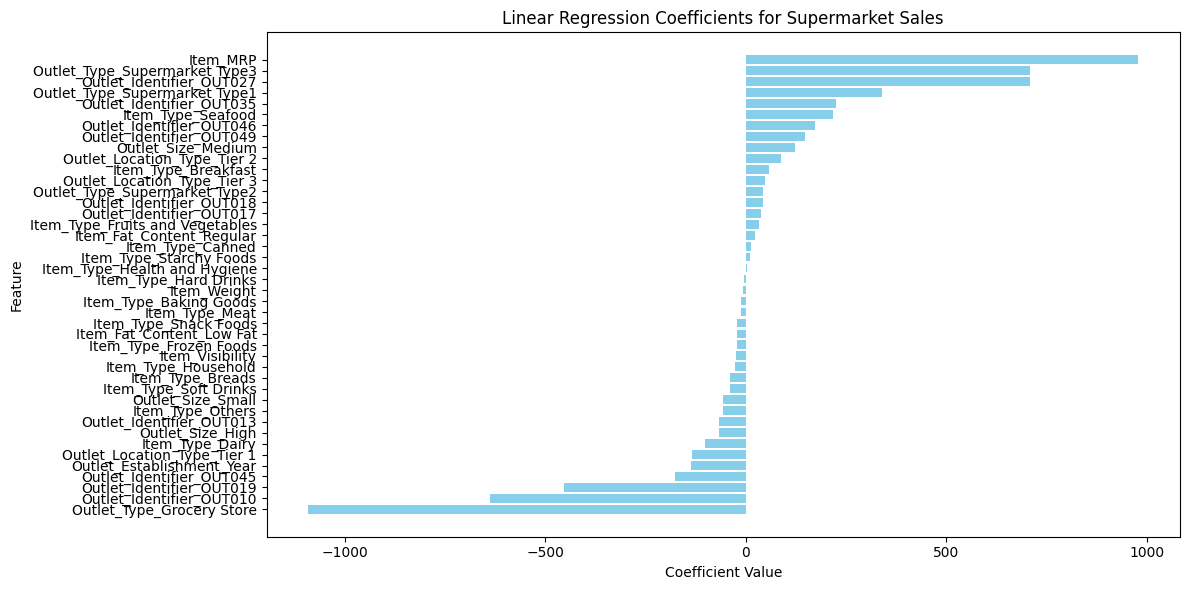

In [22]:
import matplotlib.pyplot as plt
# Get feature names from preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame of coefficients
lin_coefs = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

# Display top 10 and bottom 10
print("Top Positive Coefficients:")
print(lin_coefs.head(10))
print("\nMost Negative Coefficients:")
print(lin_coefs.tail(10))

# Plot all coefficients
plt.figure(figsize=(12,6))
plt.barh(lin_coefs["Feature"], lin_coefs["Coefficient"], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients for Supermarket Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("linear_regression_coefficients.png")
plt.show()


The top three most impactful features are:

Item_MRP (Coefficient = +979.46)
This means that higher product prices (MRP) are strongly associated with higher sales. Expensive or premium items bring in more sales value.
In simple terms: when the product’s price increases, sales usually go up too.

Outlet_Type_Supermarket Type3 (Coefficient = +709.60)
Supermarkets of Type 3 perform significantly better than other types. These outlets might be large or located in busy areas, which helps them generate more sales.
In simple terms: stores with this type usually sell more.

Outlet_Identifier_OUT027 (Coefficient = +709.60)
This outlet stands out with high sales performance. It could be due to its location, size, or popularity among customers.

# ree-Based Model

Top 10 Most Important Features:
                            Feature  Importance
2                          Item_MRP    0.510008
38        Outlet_Type_Grocery Store    0.265315
1                   Item_Visibility    0.045508
41    Outlet_Type_Supermarket Type3    0.045383
27         Outlet_Identifier_OUT027    0.044352
0                       Item_Weight    0.020677
3         Outlet_Establishment_Year    0.018228
12  Item_Type_Fruits and Vegetables    0.003592
19            Item_Type_Snack Foods    0.003366
10                  Item_Type_Dairy    0.002916


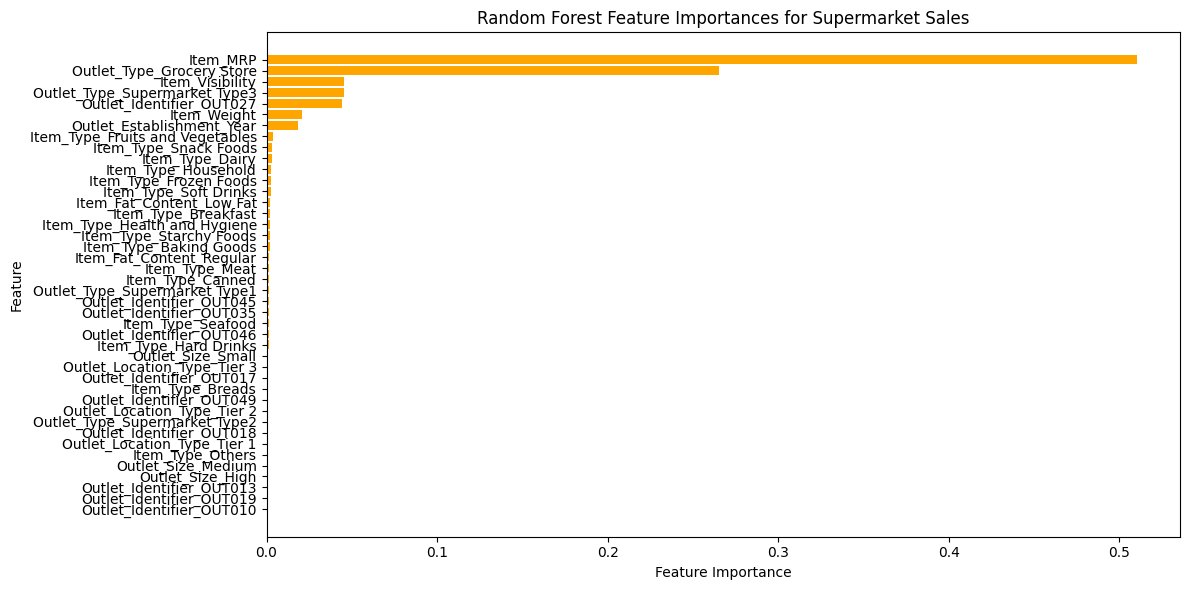

In [23]:

importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top features
print("Top 10 Most Important Features:")
print(importances.head(10))

# Plot feature importances
plt.figure(figsize=(12,6))
plt.barh(importances["Feature"], importances["Importance"], color='orange')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances for Supermarket Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("random_forest_feature_importances.png")
plt.show()


The top five most important features are:

Item_MRP (Importance = 0.5100)
This is by far the most important feature in the model. It means that the product’s price (Maximum Retail Price) has the strongest influence on predicting sales.
In simple terms: expensive or premium products usually bring in higher sales values.

Outlet_Type_Grocery Store (Importance = 0.2653)
This feature also plays a major role in determining sales. The model found that whether the outlet is a Grocery Store has a strong effect on how much it sells.
In simple terms: the type of outlet heavily impacts sales — grocery stores behave very differently from supermarkets.

Item_Visibility (Importance = 0.0455)
How visible an item is on the shelf influences its sales. Products that are easier to notice or well-placed can attract more buyers.
In simple terms: items with better visibility tend to sell more.

Outlet_Type_Supermarket Type3 (Importance = 0.0454)
This supermarket type is one of the strongest positive drivers of sales. Type 3 supermarkets are likely large, modern, or located in high-demand areas.
In simple terms: this kind of supermarket consistently performs better.

Outlet_Identifier_OUT027 (Importance = 0.0444)
This specific outlet is one of the top-performing stores in the dataset. Its characteristics—such as location, management, or size—likely contribute to its high sales.
In simple terms: Outlet OUT027 sells significantly more than most other outlets.